yes, the basic building block is the hoefdding inequality, you have red and green balls, you want to approximate the frequency of red balls from samples, let's call the true frequency $\mu$ and the estimated one from samples $v$. 

the hoefdding inequality  tells us that the statement "$\mu=v$" is 
probably approximately correct (P.A.C), they are close in a probabilistic sense for a given tolerance $\epsilon$ and a sample size N :

$P(|v - \mu| > \epsilon) <= 2e^{-2\epsilon^2 N}$

which should be read P(bad event) <= ..., the bad event is the event of v and $\mu$ being not close according to the chosen tolerance. this ineequality holds for any sample size and tolerance. this inequality role is to guarantee that the estimator is close to the real value in this probabilistic sense.

it is a tradeoff, more tolerance needs more points to achieve the same upper bound.

now, what is the relationship to learning ?

let's fix one hypothesis h, and each ball in the population we sample is an input point, and the red balls are input  points with $h(x) = f(x)$ and the greeen balls are input points with $h(x) != f(x) $. then we do the same, we count the freqs. Then hoefdinng inequality tells us :


$P(|trainError(h) - testError(h)| > \epsilon) <= 2e^{-2\epsilon^2 N}$

so this now tells us that training error will be close to test error under this probablistic sense, this is **verification** not learning. we have one hypothesis and we want to see whether it is possible to learn. if we have multiple hypotheses $h_1$ to $h_M$ and we finally choose some hypothesis $h_g$ after training where g can be any of the possible hypotheses, then  :

$P(|trainError(h_g) - testError(h_g)| > \epsilon) <= P(|trainError(h_1) - testError(h_1)| > \epsilon \\OR \\  
                                                       |trainError(h_2) - testError(h_2)| > \epsilon \\OR ...\\
                                                       |trainError(h_M) - testError(h_M)| > \epsilon \\OR \\
                                                       )$

in the worst case we just sum up:

$P(|trainError(h_g) - testError(h_g)| > \epsilon) <= 2Me^{-2\epsilon^2 N}$

intuitively this tells that if we have only one hypothesis then it has some probability of being a bad hypothesis,now if you have multiple hypotheses, then the probability of selecting a bad hypotehsis gets bigger because you have more hypotheses and so more chance of a 'bad hypothesis' event to happen.

now we are talking about learning, the probabilistic process is the following, we generate a dataset from the unknown probability distribution, we explore the hypothesis set using our training algorithm to select some final hypothesis g. then this bound tells us that learning is feasible whatever the final hypothesis we have chosen (it is feasiable in the sense that the probability of not generalizing to test data is upper bounded).
So this hoeding inequality is not the whole story, the only thing of what this tell us is that training error will be close to test error, but the exploration of the hypothesis set using the training algorithm is also important because:
what we also want is to have a low training error, so that the test error is also low if we follow heofding ineq.

**So why learning is possible ? because the modified hoefding inequality for multiple hypotehse tells you that learning is feasible (becasue we bound the probability of bad hypotehses) whatever is the hypothesis you select from the possible hypotheses. So, learning behaves well**
Also, Hoefding inequality is good because you don't need to make assumptions of the data generating process( the bound does not depend on the data generating process), this is one of the premises of machine learning

In [21]:
from math import exp
epsilon, N = 0.001, 1000000
ub = 2 * exp(-2 * epsilon**2 * N)
print('P(|v - \mu| > \epsilon) <= {}'.format(ub))

P(|v - \mu| > \epsilon) <= 0.270670566473


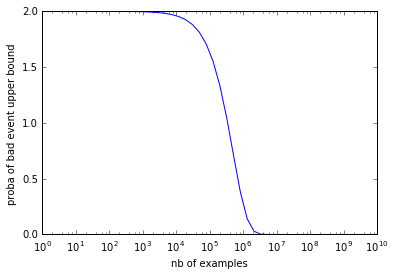

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
epsilon, N = 0.001, np.logspace(0, 10)
ub = 2 * np.exp(-2 * epsilon**2 * N)
plt.plot(N, ub)
plt.xlabel('nb of examples')
plt.ylabel('proba of bad event upper bound')
plt.xscale('log')

In [3]:
mu = 0.8
N = 5000
epsilon = 0.01
repeats = 100000
samples = np.random.uniform(size=(repeats, N)) <= mu
v = samples.mean(axis=1)
ub = 2 * np.exp(-2 * epsilon**2 * N)
bad = (np.abs(v - mu) > epsilon).mean()
print('obtained proportion of bad events : {}, upper bound for bad events proportion : {}'.format(bad, ub))

obtained proportion of bad events : 0.07957, upper bound for bad events proportion : 0.735758882343
